## Data Exploration

### Analyze the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler 

In [2]:
sub_df = pd.read_csv('sample_submission.csv')
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11504793,11504793,Male,48,1,6.0,0,1-2 Year,Yes,27412.0,26.0,218,0
11504794,11504794,Female,26,1,36.0,0,< 1 Year,Yes,29509.0,152.0,115,1
11504795,11504795,Female,29,1,32.0,1,< 1 Year,No,2630.0,152.0,189,0
11504796,11504796,Female,51,1,28.0,0,1-2 Year,Yes,48443.0,26.0,274,1


In [4]:
test_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148
...,...,...,...,...,...,...,...,...,...,...,...
7669861,19174659,Male,57,1,28.0,0,1-2 Year,Yes,51661.0,124.0,109
7669862,19174660,Male,28,1,50.0,1,< 1 Year,No,25651.0,152.0,184
7669863,19174661,Male,47,1,33.0,1,1-2 Year,No,2630.0,138.0,63
7669864,19174662,Male,30,1,28.0,0,< 1 Year,Yes,38866.0,124.0,119


In [5]:
print(f"Number of rows are: {len(train_df.axes[0])}")
print(f"Number of columns are: {len(train_df.axes[1])}")

Number of rows are: 11504798
Number of columns are: 12


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [7]:
train_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
train_df.duplicated().sum()

0

In [9]:
categorical_columns = ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']
numerical_columns = ['id', 'Age', 'Annual_Premium', 'Vintage']

### What can we summarize from our exploration above?


### Categorical Columns

|    Feature    |   Description   | 
| ------------- | ----------------|
| Gender | Male and Female   | 
| Driving_License | 0: Does not have a Driving License yet, 1: Have a Driving License   |
| Previously_Insured | 0: The vehicle has not insured before, 1: The vehicle has insured before   |
| Vehicle_Age | Age of the vehicle   |
| Vehicle_Damage | Yes: The vehicle get damaged in the past, No: The vehicle did not get their vehicle damaged in the past   |


### Numerical Columns
|    Feature    |   Description   | 
| ------------- | ----------------|
| Id | Unique id for customer   | 
| Age | Age of the customer   |
| Annual_Premium | The amount customer needs to pay as premium in the year   |
| Vintage | How many days the customer associated with the company   |

In [10]:
df_categorical = train_df[categorical_columns]
df_categorical

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Response
0,Male,1,35.0,0,1-2 Year,Yes,0
1,Male,1,28.0,0,> 2 Years,Yes,1
2,Female,1,14.0,1,< 1 Year,No,0
3,Female,1,1.0,0,1-2 Year,Yes,0
4,Female,1,15.0,1,1-2 Year,No,0
...,...,...,...,...,...,...,...
11504793,Male,1,6.0,0,1-2 Year,Yes,0
11504794,Female,1,36.0,0,< 1 Year,Yes,1
11504795,Female,1,32.0,1,< 1 Year,No,0
11504796,Female,1,28.0,0,1-2 Year,Yes,1


In [11]:
df_numerical = train_df[numerical_columns]
df_numerical

,id,Age,Annual_Premium,Vintage
0,0,21,65101.0,187
1,1,43,58911.0,288
2,2,25,38043.0,254
3,3,35,2630.0,76
4,4,36,31951.0,294
...,...,...,...,...
11504793,11504793,48,27412.0,218
11504794,11504794,26,29509.0,115
11504795,11504795,29,2630.0,189
11504796,11504796,51,48443.0,274


In [12]:
train_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.752398e+06,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,3.321149e+06,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.876199e+06,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,5.752398e+06,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,8.628598e+06,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.150480e+07,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


In [13]:
pd.Series({col:train_df[col].nunique() for col in train_df})

id                      11504798
Gender                         2
Age                           66
Driving_License                2
Region_Code                   54
Previously_Insured             2
Vehicle_Age                    3
Vehicle_Damage                 2
Annual_Premium             51728
Policy_Sales_Channel         152
Vintage                      290
Response                       2
dtype: int64

### Visualize the Data
Experimenting and Stroytelling using charts to understand the relationships between variables

In [14]:
# first, let's make a copy for our train_df so our original data does not affected
# it is a good practice folks, so make sure you are alert with this

df = train_df.copy()
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


<Axes: xlabel='Vehicle_Age', ylabel='count'>

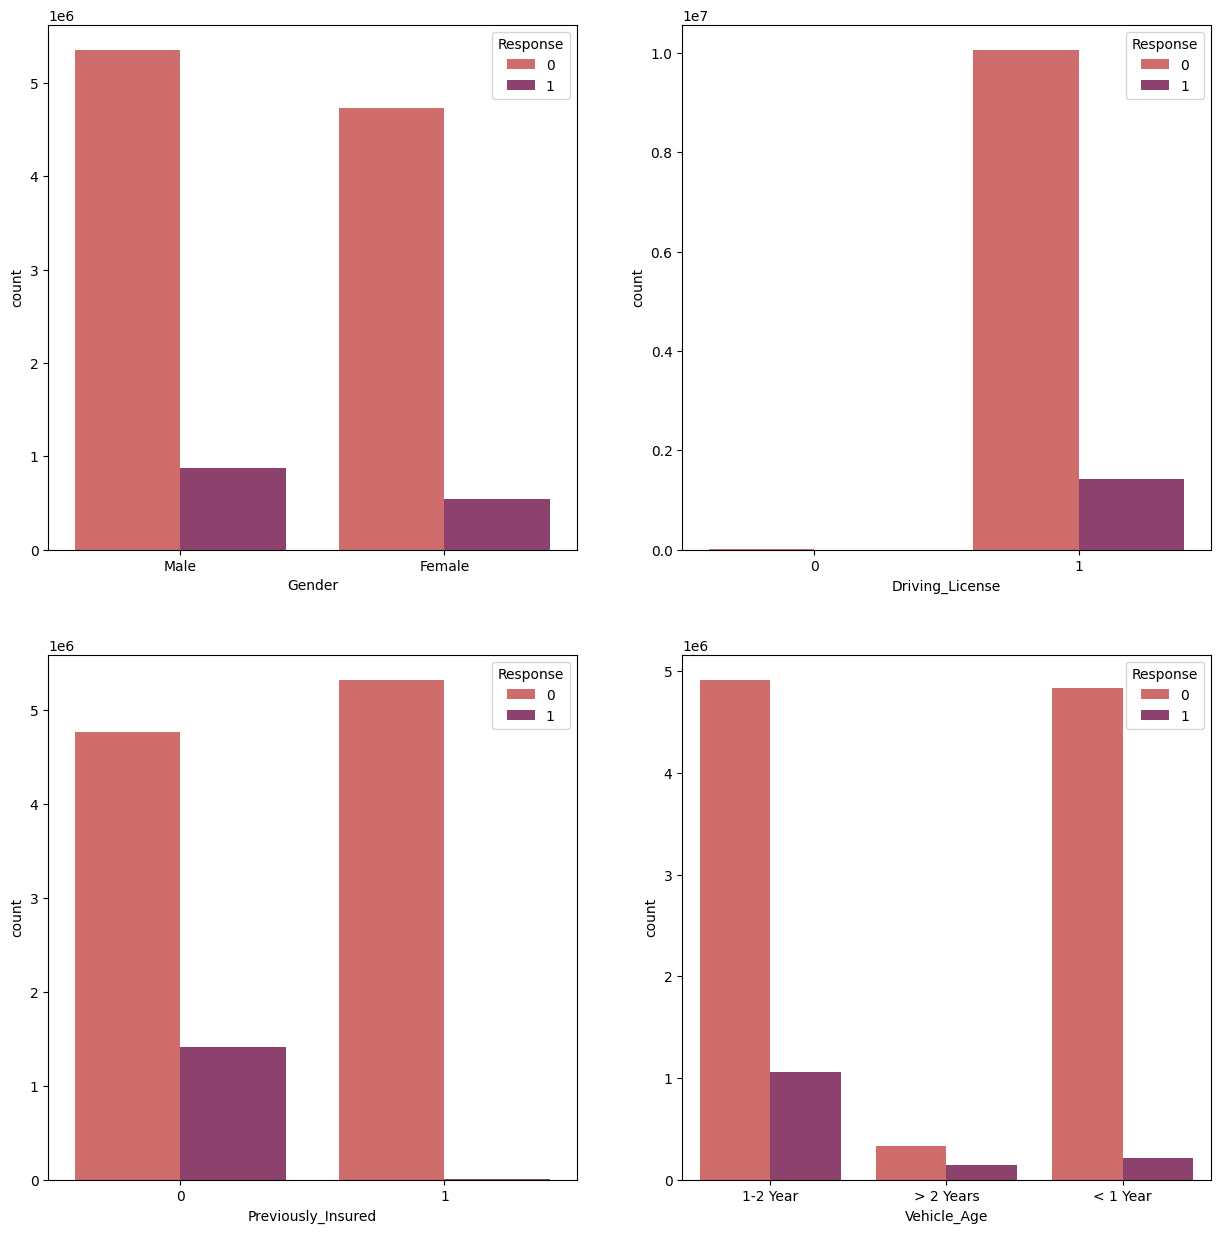

In [15]:
#Distribution of Categorical Columns
fig, axes = plt.subplots(2, 2, figsize=(15, 15)) 

sns.countplot(ax=axes[0,0],x='Gender',hue='Response',data=df,palette="flare")
sns.countplot(ax=axes[0,1],x='Driving_License',hue='Response',data=df,palette="flare")
sns.countplot(ax=axes[1,0],x='Previously_Insured',hue='Response',data=df,palette="flare")
sns.countplot(ax=axes[1,1],x='Vehicle_Age',hue='Response',data=df,palette="flare")


<Axes: xlabel='Vehicle_Damage', ylabel='count'>

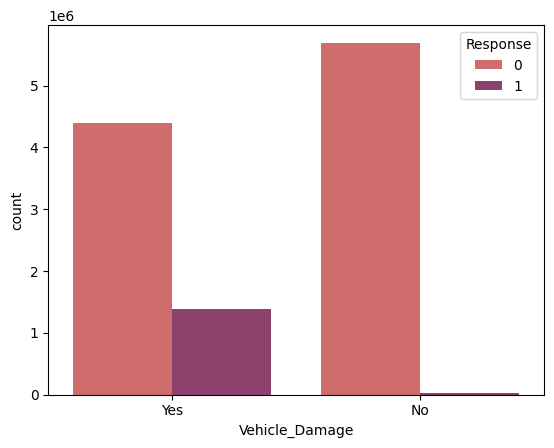

In [16]:
sns.countplot(x='Vehicle_Damage',hue='Response',data=df,palette="flare")

<Axes: xlabel='Response', ylabel='Count'>

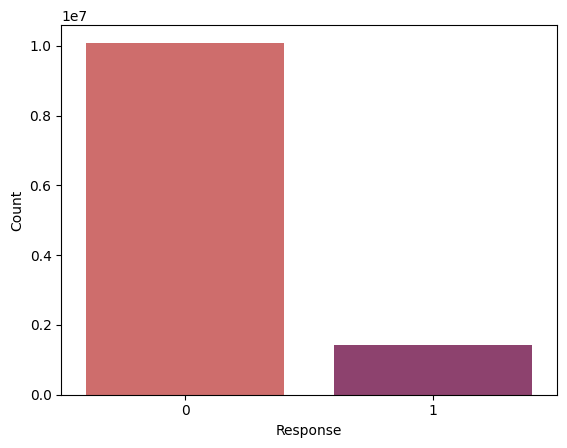

In [17]:
Response = df.loc[:, "Response"].value_counts().rename('Count')
plt.xlabel("Response")
plt.ylabel("Count")

sns.barplot(x=Response.index, y=Response.values, palette="flare")

# The given problem is an imbalance problem as the Response variable with the value 1 is significantly lower than the value zero.

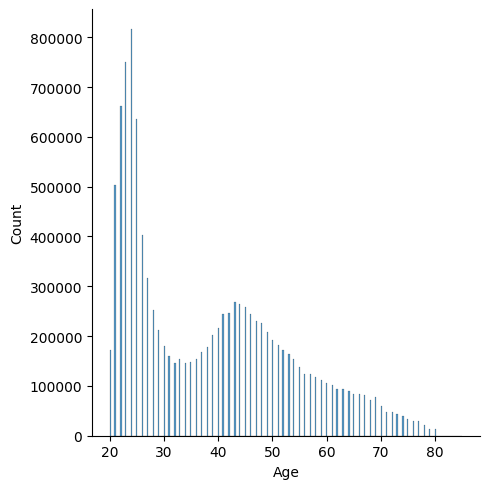

In [18]:
sns.displot(df['Age'])

## Data Preprocessing

In [19]:
def data_prep(df):

    df= df.drop(columns=['id','Vintage','Region_Code', 'Policy_Sales_Channel'])

    df=pd.get_dummies(df,columns=['Gender'] ,prefix='Gender', dtype=int)

    df=pd.get_dummies(df,columns=['Vehicle_Damage'] ,prefix='Damage', dtype=int)

    df=pd.get_dummies(df,columns=['Driving_License'] ,prefix='License', dtype=int)

    df=pd.get_dummies(df,columns=['Previously_Insured'] ,prefix='prev_insured', dtype=int)

    df["Age"] = pd.cut(df['Age'], bins=[0, 25, 35, 50, 100])

    df['Age']= df['Age'].cat.codes

    df['Annual_Premium'] = pd.cut(df['Annual_Premium'], bins=[0, 30000, 35000,40000, 45000, 50000, np.inf])

    df['Annual_Premium']= df['Annual_Premium'].cat.codes

    df['Vehicle_Age'] =df['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})

    return df


df_prep = data_prep(df)

In [20]:
df_prep.head()

,Age,Vehicle_Age,Annual_Premium,Response,Gender_Female,Gender_Male,Damage_No,Damage_Yes,License_0,License_1,prev_insured_0,prev_insured_1
0,0,1,5,0,0,1,0,1,0,1,1,0
1,2,2,5,1,0,1,0,1,0,1,1,0
2,0,0,2,0,1,0,1,0,0,1,0,1
3,1,1,0,0,1,0,0,1,0,1,1,0
4,2,1,1,0,1,0,1,0,0,1,0,1


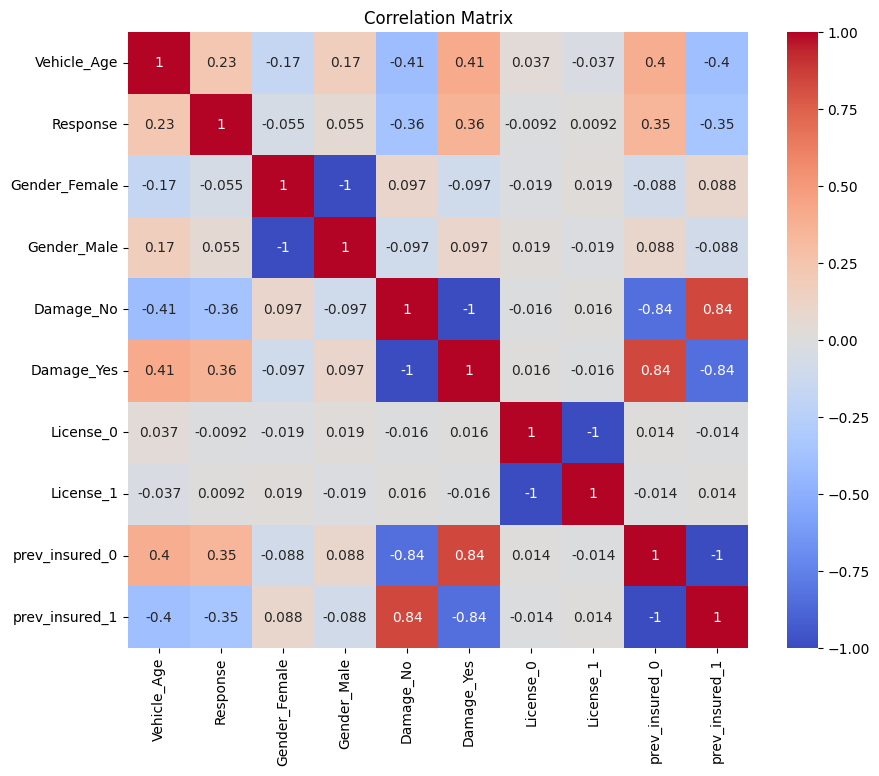

In [21]:
numerical_cols = df_prep.select_dtypes(include=[int])
corr = numerical_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [22]:
features=['Age', 'Vehicle_Age', 'Annual_Premium', 'Gender_Female', 'Gender_Male', 'Damage_No', 'Damage_No', 'Damage_Yes', 'License_0', 'License_1', 'prev_insured_0', 'prev_insured_1']

In [23]:
X_train, X_Test, y_train, y_test = train_test_split(df_prep[features],
                                                    df_prep['Response'],
                                                    test_size=0.3,
                                                    random_state=30)

In [24]:
X_train.shape, X_Test.shape

((8053358, 12), (3451440, 12))

In [25]:
# handling imbalance response 
# %pip install imblearn 

In [26]:
RUS = RandomUnderSampler(sampling_strategy=.5, random_state=3)
X_train_rus,y_train_rus = RUS.fit_resample(df_prep[features],
                                   df_prep['Response'])

In [27]:
def performance_overview(model, X_train, y_train, X_Test, y_test):
    train_f1=f1_score(y_train, model.predict(X_train))
    train_acc=accuracy_score(y_train, model.predict(X_train))
    
    test_f1=f1_score(y_test, model.predict(X_Test))
    test_acc=accuracy_score(y_test, model.predict(X_Test))
    
    print("Train score: accuracy:{} f1:{}".format(train_acc, train_f1))
    print("Test score: accuracy:{} f1:{}".format(test_acc, test_f1))

## Modelling

In [28]:
# Logistic Regression
model = LogisticRegression()
model.fit(X_train_rus, y_train_rus)
performance_overview(model, X_train_rus, y_train_rus, X_Test, y_test)

Train score: accuracy:0.7495395362784638 f1:0.6910276315854474
Test score: accuracy:0.7210628027721763 f1:0.4256275240118581


In [29]:
# Decision Tree
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_rus, y_train_rus)
performance_overview(model_DT, X_train_rus, y_train_rus, X_Test, y_test)

Train score: accuracy:0.7614104194006516 f1:0.6803400557796512
Test score: accuracy:0.7613439607815868 f1:0.4399130468484922


In [30]:
# Random Forest Classifier
model_RF = RandomForestClassifier()
model_RF.fit(X_train_rus, y_train_rus)
performance_overview(model_RF, X_train_rus, y_train_rus, X_Test, y_test)

Train score: accuracy:0.7614080637862685 f1:0.6797506844542026
Test score: accuracy:0.7620004983427208 f1:0.43993893770978226


In [35]:
# Hyperparameter Tuning Random Forest

rf = RandomForestClassifier()

paramaters = {
    'bootstrap' : [True],
    'max_depth' : [20, 25],
    'min_samples_leaf' : [3, 4],
    'min_samples_split' : [100, 300]
}

In [36]:
grid_search = GridSearchCV(rf, paramaters, cv=2, verbose=2, n_jobs=-1)
grid_search.fit(X_train_rus, y_train_rus)

performance_overview(grid_search, X_train_rus, y_train_rus, X_Test, y_test)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
Train score: accuracy:0.7613482311809378 f1:0.669812369207444
Test score: accuracy:0.7725166886864613 f1:0.4399362287206155
